In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "C:/Users/Disha Devatha/Downloads/GymDataset.csv"
df = pd.read_csv(file_path)
df.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       8
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   8
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
BMI                              6
dtype: int64

In [3]:
if 'Fat_Percentage' in df.columns:
    df['Fat_Percentage'] = df['Fat_Percentage'].fillna(df['Fat_Percentage'].mode()[0])

if 'Height (m)' in df.columns:
    df['Height (m)'] = df['Height (m)'].fillna(df['Height (m)'].mode()[0])

if 'BMI' in df.columns:
    df['BMI'] = df['BMI'].fillna(df['BMI'].mode()[0])

df.isnull().sum()

IndexError: invalid index to scalar variable.

In [4]:
df.fillna({
    'Fat_percentage': df['Fat_Percentage'].mean(),
    'Height (m)': df['Height (m)'].mean(),
    'BMI': df['BMI'].mean(),
}, inplace=True
)

df.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   8
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
BMI                              0
dtype: int64

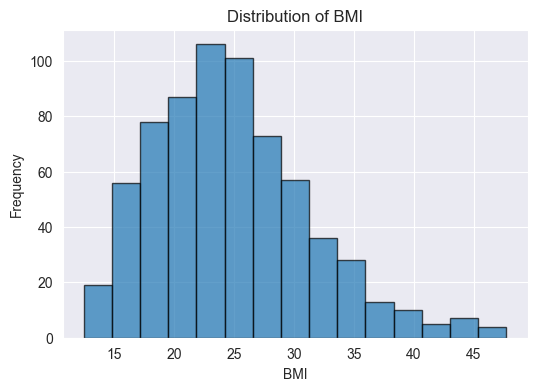

In [10]:
plt.figure(figsize=(6, 4))
plt.hist(df['BMI'], bins=15, edgecolor='k', alpha=0.7)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

In [ ]:
Interpretation:
The histogram shows BMI values are approximately normally distributed, with most individuals having BMI between 22 and 28. BMI ranges from 10 to 50, with fewer individuals at the extremes (below 15 or above 40). This indicates a majority fall within or near the "normal" BMI range.

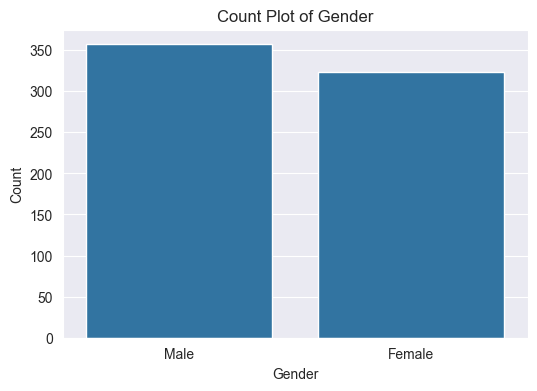

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender')
plt.title('Count Plot of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [ ]:
Interpretation:
The count plot shows a nearly equal distribution of males and females in the dataset, with males being slightly more represented. Both genders have approximately 350 and 320 counts, respectively. This indicates a well-balanced dataset in terms of gender representation.

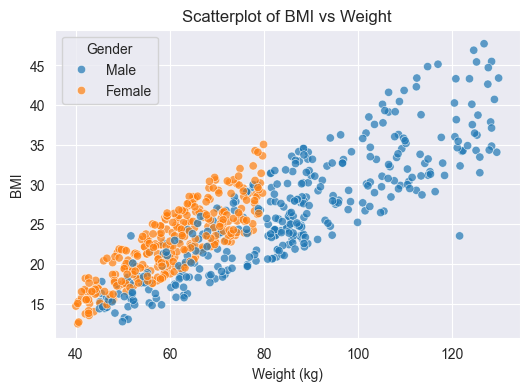

In [13]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='Weight (kg)', y='BMI', hue='Gender', alpha=0.7)
plt.title('Scatterplot of BMI vs Weight')
plt.xlabel('Weight (kg)')
plt.ylabel('BMI')
plt.legend(title='Gender')
plt.show()

In [ ]:
Interpretation:
The scatterplot shows a strong positive correlation between weight and BMI, indicating that higher weight generally corresponds to higher BMI. Male data points tend to cluster at higher weight and BMI ranges, while female data points are more concentrated at lower ranges. This highlights gender-related differences in weight and BMI distribution within the datase

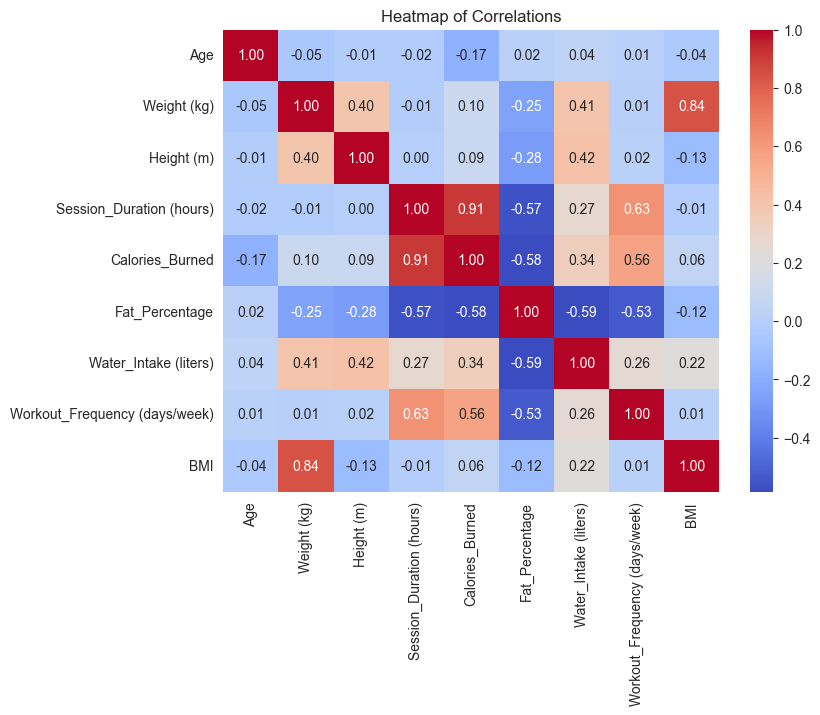

In [16]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Heatmap of Correlations')
plt.show()

In [ ]:
Interpretation:
The heatmap shows strong positive correlations between Weight (kg) and BMI (0.84) and between Session Duration and Calories Burned (0.91). Fat Percentage negatively correlates with both Session Duration (-0.57) and Calories Burned (-0.58). These relationships highlight how weight, activity duration, and calorie burn impact fitness metrics.

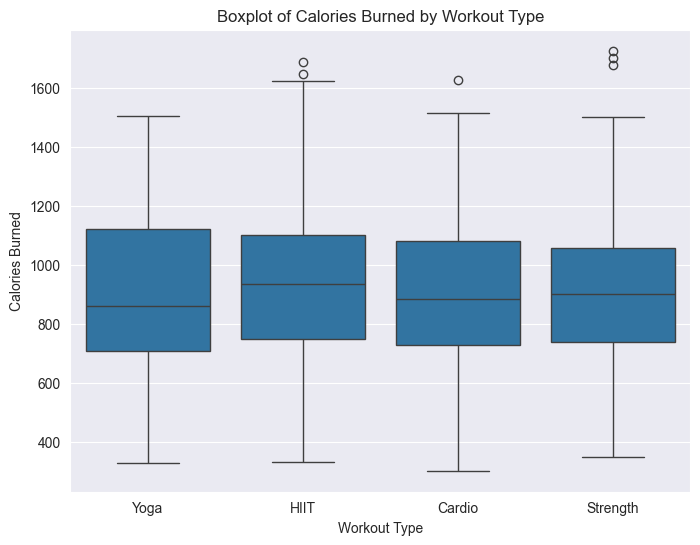

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Workout_Type', y='Calories_Burned')
plt.title('Boxplot of Calories Burned by Workout Type')
plt.xlabel('Workout Type')
plt.ylabel('Calories Burned')
plt.show()

In [ ]:
Interpretation:
The boxplot shows similar calorie burn distributions across workout types, with median values around 800-1000 calories. HIIT and Strength have more outliers, indicating greater variability in calorie burn. Overall, calorie burns are consistent across workout types.

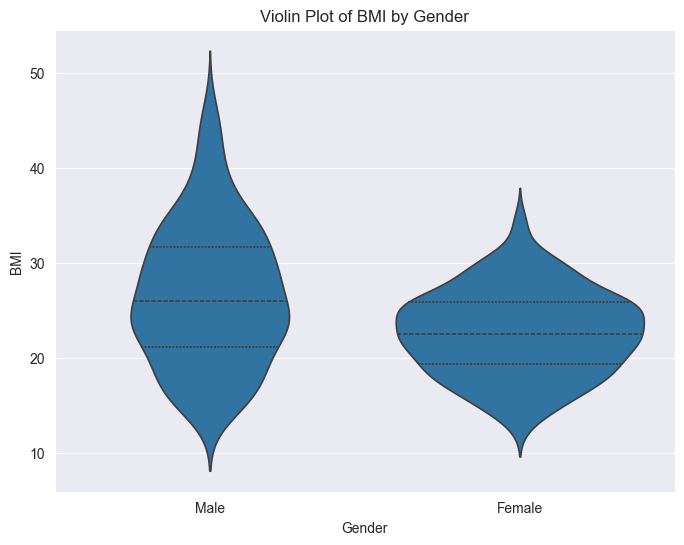

In [20]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='Gender', y='BMI', inner="quartile")
plt.title('Violin Plot of BMI by Gender')
plt.xlabel('Gender')
plt.ylabel('BMI')
plt.show()

In [ ]:
Interpretation:
The violin plot shows that males have a wider range of BMI values, with more outliers at higher BMI levels compared to females. Females have a more concentrated BMI distribution, with fewer extreme values. Both genders share a similar median BMI around the midrange.

In [3]:
data = {'Gender': ['Male', 'Female', 'Female', 'Male'],
        'Workout_Type': ['Yoga', 'HIIT', 'Cardio', 'Strength']}
df = pd.DataFrame(data)

df_encoded = pd.get_dummies(df, columns=['Gender', 'Workout_Type'], drop_first=False)

print(df_encoded)

   Gender_Female  Gender_Male  Workout_Type_Cardio  Workout_Type_HIIT  \
0          False         True                False              False   
1           True        False                False               True   
2           True        False                 True              False   
3          False         True                False              False   

   Workout_Type_Strength  Workout_Type_Yoga  
0                  False               True  
1                  False              False  
2                  False              False  
3                   True              False  


In [ ]:
Interpretation:
The one-hot encoding process converts categorical variables into binary columns. Each unique category in Gender and Workout_Type is represented as a separate column with values True (1) or False (0). This allows categorical data to be used in numerical computations and machine learning models.